# <h1><center>ANALYZING DATA FROM SCRATCH IN PYTHON</center></h1>

## <span style="color:red"> 1) DATA PRE-PROCESSING</span>

**Note**: The data set that we will use in this lesson is called *fakedata_datacamp_byisi.xlsx*, it is forbidden to distribute the data set to third parties without the permission of the author of the course (Isidora Gatarić). 

In [4]:
# Importing the Python (.py) packages that we will need
# pip install plotly 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [5]:
# Loading the data set we are going to work on
ig = pd.read_excel('fake_datacamp_dataset.xlsx')
ig

,ID,Sex,Age,Student_expert,Field_study_work,Number_of_purchased_courses,Number_of_views_of_this_course,Most_viewed_Dccourses,Bought_on_discount,City,Time_spent_on_course_hours,Time_spent_on_course_firstday_hours
0,15276,male,22.0,student,IT,NaN,0,1869,yes,Beograd,NaN,NaN
1,1200,male,23.0,student,Services,NaN,149,2642,yes,Beograd,26.0,1.0
2,14838,male,24.0,student,Architecture and design,35.0,23,1553,yes,Beograd,2.0,2.0
3,22700,male,25.0,student,Food industry,7.0,0,3144,yes,Beograd,NaN,NaN
4,6835,male,45.0,student,IT,96.0,74,1688,yes,Beograd,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2288,female,30.0,student,Economy and finance,NaN,5,536,no,Ruma,1.0,1.0
1496,42486,female,30.0,student,Economy and finance,14.0,26,1320,no,Valjevo,8.0,6.0
1497,37988,female,30.0,student,Economy and finance,59.0,18,1415,no,Beograd,1.0,1.0
1498,36484,female,30.0,student,Economy and finance,48.0,70,1025,no,Beograd,24.0,6.0


In [6]:
# Information about the variables/measures/features that we have in the data set
ig.columns.to_list()

['ID',
 'Sex',
 'Age',
 'Student_expert',
 'Field_study_work',
 'Number_of_purchased_courses',
 'Number_of_views_of_this_course',
 'Most_viewed_Dccourses',
 'Bought_on_discount',
 'City',
 'Time_spent_on_course_hours',
 'Time_spent_on_course_firstday_hours']

In [7]:
# Information about how many cases (rows) we have in the data set
# Reminder: INT64 (integer), FLOAT64 (decimals) & OBJECT (string)
ig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   1500 non-null   int64  
 1   Sex                                  1491 non-null   object 
 2   Age                                  1494 non-null   float64
 3   Student_expert                       1500 non-null   object 
 4   Field_study_work                     1500 non-null   object 
 5   Number_of_purchased_courses          981 non-null    float64
 6   Number_of_views_of_this_course       1500 non-null   int64  
 7   Most_viewed_Dccourses                1500 non-null   int64  
 8   Bought_on_discount                   1500 non-null   object 
 9   City                                 1460 non-null   object 
 10  Time_spent_on_course_hours           1148 non-null   float64
 11  Time_spent_on_course_firstday_

In [8]:
# Information about the data types we have in the data set
ig.dtypes

ID                                       int64
Sex                                     object
Age                                    float64
Student_expert                          object
Field_study_work                        object
Number_of_purchased_courses            float64
Number_of_views_of_this_course           int64
Most_viewed_Dccourses                    int64
Bought_on_discount                      object
City                                    object
Time_spent_on_course_hours             float64
Time_spent_on_course_firstday_hours    float64
dtype: object

In [9]:
# The function (df.head()) inform us about the first N cases in the data set, we will take N = 10 as an example
ig.head(10)

,ID,Sex,Age,Student_expert,Field_study_work,Number_of_purchased_courses,Number_of_views_of_this_course,Most_viewed_Dccourses,Bought_on_discount,City,Time_spent_on_course_hours,Time_spent_on_course_firstday_hours
0,15276,male,22.0,student,IT,NaN,0,1869,yes,Beograd,NaN,NaN
1,1200,male,23.0,student,Services,NaN,149,2642,yes,Beograd,26.0,1.0
2,14838,male,24.0,student,Architecture and design,35.0,23,1553,yes,Beograd,2.0,2.0
3,22700,male,25.0,student,Food industry,7.0,0,3144,yes,Beograd,NaN,NaN
4,6835,male,45.0,student,IT,96.0,74,1688,yes,Beograd,11.0,1.0
5,34477,male,32.0,student,Car industry,1.0,2,209,yes,Beograd,NaN,NaN
6,31737,male,24.0,student,Construction industry,NaN,18,555,yes,Beograd,7.0,1.0
7,16034,male,35.0,student,Trade,14.0,14,645,yes,Beograd,1.0,1.0
8,28081,male,46.0,student,Food industry,51.0,0,1042,yes,Beograd,NaN,NaN
9,41073,male,57.0,student,IT,NaN,602,9050,yes,Beograd,89.0,2.0


In [10]:
# The function with which we are informed about the last N cases in the data set, we will again take N = 10
ig.tail(10)

,ID,Sex,Age,Student_expert,Field_study_work,Number_of_purchased_courses,Number_of_views_of_this_course,Most_viewed_Dccourses,Bought_on_discount,City,Time_spent_on_course_hours,Time_spent_on_course_firstday_hours
1490,47979,female,30.0,student,Economy and finance,48.0,54,1270,no,Beograd,21.0,8.0
1491,38734,female,30.0,student,Economy and finance,NaN,32,1020,no,Beograd,5.0,2.0
1492,34958,female,30.0,student,Economy and finance,14.0,10,921,no,Beograd,0.0,0.0
1493,873,female,30.0,student,Economy and finance,22.0,0,1434,no,Beograd,NaN,NaN
1494,23610,female,30.0,student,Economy and finance,11.0,109,1823,no,Beograd,17.0,8.0
1495,2288,female,30.0,student,Economy and finance,NaN,5,536,no,Ruma,1.0,1.0
1496,42486,female,30.0,student,Economy and finance,14.0,26,1320,no,Valjevo,8.0,6.0
1497,37988,female,30.0,student,Economy and finance,59.0,18,1415,no,Beograd,1.0,1.0
1498,36484,female,30.0,student,Economy and finance,48.0,70,1025,no,Beograd,24.0,6.0
1499,19736,female,30.0,student,Economy and finance,18.0,5,447,no,Beograd,1.0,1.0


In [11]:
# Renaming the columns in the data set (e.g. the "Age" column will be called "AGE")
ig.rename(columns={'Age':'AGE'}, inplace=True)
ig

,ID,Sex,AGE,Student_expert,Field_study_work,Number_of_purchased_courses,Number_of_views_of_this_course,Most_viewed_Dccourses,Bought_on_discount,City,Time_spent_on_course_hours,Time_spent_on_course_firstday_hours
0,15276,male,22.0,student,IT,NaN,0,1869,yes,Beograd,NaN,NaN
1,1200,male,23.0,student,Services,NaN,149,2642,yes,Beograd,26.0,1.0
2,14838,male,24.0,student,Architecture and design,35.0,23,1553,yes,Beograd,2.0,2.0
3,22700,male,25.0,student,Food industry,7.0,0,3144,yes,Beograd,NaN,NaN
4,6835,male,45.0,student,IT,96.0,74,1688,yes,Beograd,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2288,female,30.0,student,Economy and finance,NaN,5,536,no,Ruma,1.0,1.0
1496,42486,female,30.0,student,Economy and finance,14.0,26,1320,no,Valjevo,8.0,6.0
1497,37988,female,30.0,student,Economy and finance,59.0,18,1415,no,Beograd,1.0,1.0
1498,36484,female,30.0,student,Economy and finance,48.0,70,1025,no,Beograd,24.0,6.0


In [12]:
# Subset creation (e.g. we want to select only male participants and have them in our MALE subset)
male = ig.loc[ig['Sex'].isin(['male'])]
male

,ID,Sex,AGE,Student_expert,Field_study_work,Number_of_purchased_courses,Number_of_views_of_this_course,Most_viewed_Dccourses,Bought_on_discount,City,Time_spent_on_course_hours,Time_spent_on_course_firstday_hours
0,15276,male,22.0,student,IT,NaN,0,1869,yes,Beograd,NaN,NaN
1,1200,male,23.0,student,Services,NaN,149,2642,yes,Beograd,26.0,1.0
2,14838,male,24.0,student,Architecture and design,35.0,23,1553,yes,Beograd,2.0,2.0
3,22700,male,25.0,student,Food industry,7.0,0,3144,yes,Beograd,NaN,NaN
4,6835,male,45.0,student,IT,96.0,74,1688,yes,Beograd,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1446,23730,male,30.0,student,IT,4.0,3,324,no,Beograd,NaN,NaN
1447,31230,male,30.0,student,IT,0.0,84,2423,no,Novi Sad,13.0,9.0
1448,6934,male,30.0,student,IT,18.0,0,1983,no,Novi Sad,NaN,NaN
1449,41447,male,30.0,student,IT,NaN,0,939,no,Novi Sad,NaN,NaN


In [13]:
# All the functions that we have used so far on the data set, you can also use for subsets
# For example, if we want to see the number of rows and columns we have in this subset
male.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1020 entries, 0 to 1450
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   1020 non-null   int64  
 1   Sex                                  1020 non-null   object 
 2   AGE                                  1014 non-null   float64
 3   Student_expert                       1020 non-null   object 
 4   Field_study_work                     1020 non-null   object 
 5   Number_of_purchased_courses          665 non-null    float64
 6   Number_of_views_of_this_course       1020 non-null   int64  
 7   Most_viewed_Dccourses                1020 non-null   int64  
 8   Bought_on_discount                   1020 non-null   object 
 9   City                                 992 non-null    object 
 10  Time_spent_on_course_hours           774 non-null    float64
 11  Time_spent_on_course_firstday_hours

In [14]:
# Information about unique values on the variable "Field_of_work"
cc = ig.Field_study_work.unique()
print(*cc, sep = "\n")

IT
Services
Architecture and design
Food industry
Car industry
Construction industry
Trade
Other
Tourism and catering
Healthcare and pharmacy
Agriculture
Economy and finance


In [15]:
# Information about how many cases we have within each category on the variable "Field_of_work"
ig.Field_study_work.value_counts()

Field_study_work
IT                         1300
Economy and finance         122
Architecture and design      48
Services                     13
Other                         5
Construction industry         4
Food industry                 2
Healthcare and pharmacy       2
Car industry                  1
Trade                         1
Tourism and catering          1
Agriculture                   1
Name: count, dtype: int64

In [16]:
# Identical line of code as above, but gives the data as a percentage
ig_pp = ig.Field_study_work.value_counts(normalize=True)
print(ig_pp*100)

Field_study_work
IT                         86.666667
Economy and finance         8.133333
Architecture and design     3.200000
Services                    0.866667
Other                       0.333333
Construction industry       0.266667
Food industry               0.133333
Healthcare and pharmacy     0.133333
Car industry                0.066667
Trade                       0.066667
Tourism and catering        0.066667
Agriculture                 0.066667
Name: proportion, dtype: float64


In [17]:
# We locate the case that has the MAX value on the variable "AGE"
ig.loc[ig['AGE'].idxmax()]

ID                                        14589
Sex                                      female
AGE                                    455555.0
Student_expert                           junior
Field_study_work                             IT
Number_of_purchased_courses                 NaN
Number_of_views_of_this_course                0
Most_viewed_Dccourses                      3577
Bought_on_discount                           no
City                                   Novi Sad
Time_spent_on_course_hours                  NaN
Time_spent_on_course_firstday_hours         NaN
Name: 802, dtype: object

In [18]:
# We locate the case that has the MIN value on the variable "AGE"
ig.loc[ig['AGE'].idxmin()]

ID                                          23593
Sex                                        female
AGE                                           1.0
Student_expert                             junior
Field_study_work                               IT
Number_of_purchased_courses                  48.0
Number_of_views_of_this_course                 11
Most_viewed_Dccourses                         416
Bought_on_discount                             no
City                                   Kragujevac
Time_spent_on_course_hours                    2.0
Time_spent_on_course_firstday_hours           1.0
Name: 803, dtype: object

In [19]:
# Counting how many NaNs (missing values) we have in the entire data set
ig.isna().sum()

ID                                       0
Sex                                      9
AGE                                      6
Student_expert                           0
Field_study_work                         0
Number_of_purchased_courses            519
Number_of_views_of_this_course           0
Most_viewed_Dccourses                    0
Bought_on_discount                       0
City                                    40
Time_spent_on_course_hours             352
Time_spent_on_course_firstday_hours    352
dtype: int64

In [20]:
# Info about NaNs that we have on a certain variable (e.g."Number_of_purchased_courses"), then we can check it like this
ig['Number_of_purchased_courses'].isna().sum()

519

In [21]:
# We remove all missing values from the data set and save it as a separate df, on which we will continue with the analysis
new_data = ig.dropna()
new_data

,ID,Sex,AGE,Student_expert,Field_study_work,Number_of_purchased_courses,Number_of_views_of_this_course,Most_viewed_Dccourses,Bought_on_discount,City,Time_spent_on_course_hours,Time_spent_on_course_firstday_hours
2,14838,male,24.0,student,Architecture and design,35.0,23,1553,yes,Beograd,2.0,2.0
4,6835,male,45.0,student,IT,96.0,74,1688,yes,Beograd,11.0,1.0
7,16034,male,35.0,student,Trade,14.0,14,645,yes,Beograd,1.0,1.0
11,8913,male,34.0,student,IT,17.0,13,1673,yes,Beograd,0.0,0.0
14,25960,male,50.0,student,Services,3.0,10,754,yes,Beograd,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1494,23610,female,30.0,student,Economy and finance,11.0,109,1823,no,Beograd,17.0,8.0
1496,42486,female,30.0,student,Economy and finance,14.0,26,1320,no,Valjevo,8.0,6.0
1497,37988,female,30.0,student,Economy and finance,59.0,18,1415,no,Beograd,1.0,1.0
1498,36484,female,30.0,student,Economy and finance,48.0,70,1025,no,Beograd,24.0,6.0


In [22]:
# If we want to look NaNs only on some specific variable (e.g."Number_of_purchased_courses")
ig.dropna(subset=['Number_of_purchased_courses'])

,ID,Sex,AGE,Student_expert,Field_study_work,Number_of_purchased_courses,Number_of_views_of_this_course,Most_viewed_Dccourses,Bought_on_discount,City,Time_spent_on_course_hours,Time_spent_on_course_firstday_hours
2,14838,male,24.0,student,Architecture and design,35.0,23,1553,yes,Beograd,2.0,2.0
3,22700,male,25.0,student,Food industry,7.0,0,3144,yes,Beograd,NaN,NaN
4,6835,male,45.0,student,IT,96.0,74,1688,yes,Beograd,11.0,1.0
5,34477,male,32.0,student,Car industry,1.0,2,209,yes,Beograd,NaN,NaN
7,16034,male,35.0,student,Trade,14.0,14,645,yes,Beograd,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1494,23610,female,30.0,student,Economy and finance,11.0,109,1823,no,Beograd,17.0,8.0
1496,42486,female,30.0,student,Economy and finance,14.0,26,1320,no,Valjevo,8.0,6.0
1497,37988,female,30.0,student,Economy and finance,59.0,18,1415,no,Beograd,1.0,1.0
1498,36484,female,30.0,student,Economy and finance,48.0,70,1025,no,Beograd,24.0,6.0


In [23]:
# If we want to fill all NaN/NULL so that they are 0 in the data set, and not as empty fields
ig.fillna(0)

,ID,Sex,AGE,Student_expert,Field_study_work,Number_of_purchased_courses,Number_of_views_of_this_course,Most_viewed_Dccourses,Bought_on_discount,City,Time_spent_on_course_hours,Time_spent_on_course_firstday_hours
0,15276,male,22.0,student,IT,0.0,0,1869,yes,Beograd,0.0,0.0
1,1200,male,23.0,student,Services,0.0,149,2642,yes,Beograd,26.0,1.0
2,14838,male,24.0,student,Architecture and design,35.0,23,1553,yes,Beograd,2.0,2.0
3,22700,male,25.0,student,Food industry,7.0,0,3144,yes,Beograd,0.0,0.0
4,6835,male,45.0,student,IT,96.0,74,1688,yes,Beograd,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2288,female,30.0,student,Economy and finance,0.0,5,536,no,Ruma,1.0,1.0
1496,42486,female,30.0,student,Economy and finance,14.0,26,1320,no,Valjevo,8.0,6.0
1497,37988,female,30.0,student,Economy and finance,59.0,18,1415,no,Beograd,1.0,1.0
1498,36484,female,30.0,student,Economy and finance,48.0,70,1025,no,Beograd,24.0,6.0


<Axes: xlabel='Number_of_views_of_this_course'>

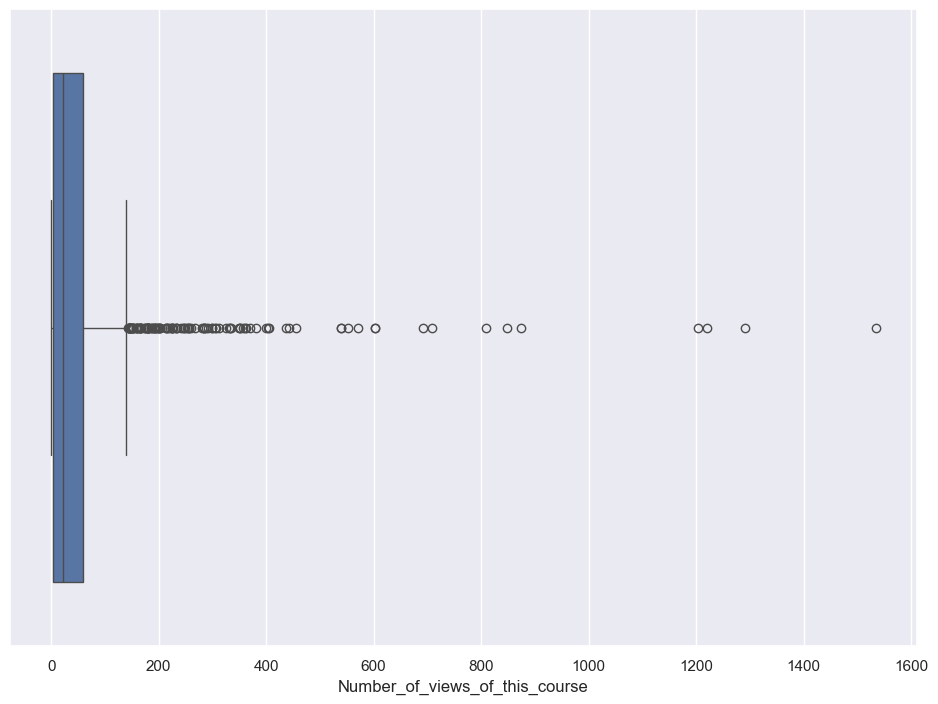

In [24]:
############ REMOWAL OF EXTREME VALUES AND OUTLIERS
# THE FIRST WAY - through boxplot and histogram we determine the limits and throw out everything that goes out of the range of those limits
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x=ig['Number_of_views_of_this_course'])

array([[<Axes: title={'center': 'Number_of_views_of_this_course'}>]],
      dtype=object)

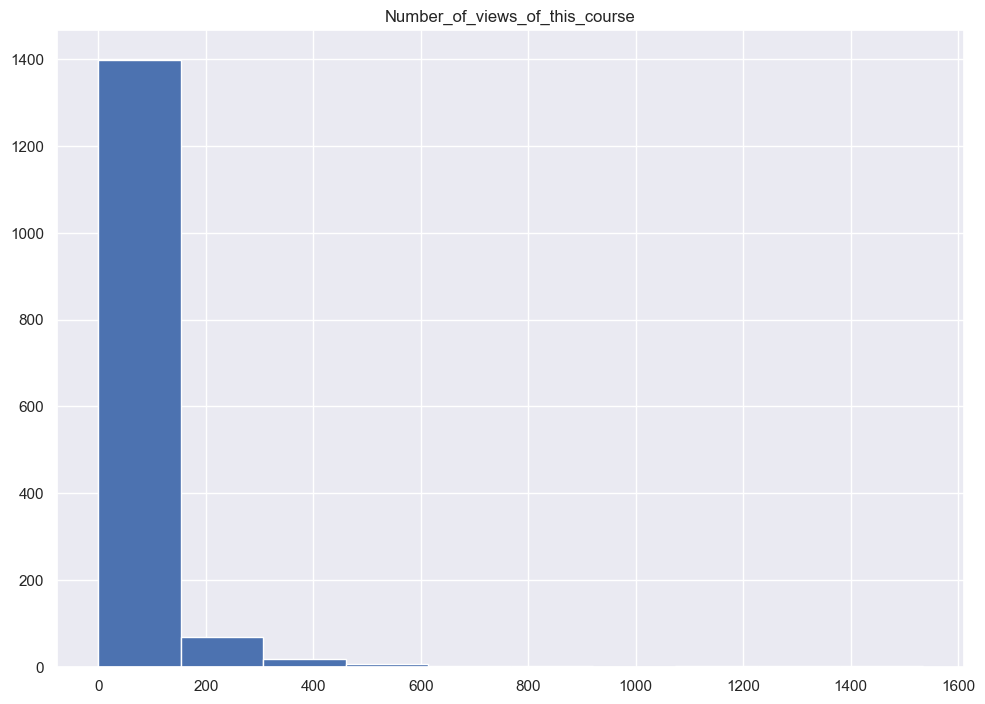

In [25]:
# Draw a histogram for this variable, to see where our (roughly) limits are (so we throw out values higher than that)
ig.hist(column='Number_of_views_of_this_course')
# We roughly determine the limit to be somewhere around 170 and throw out anything higher than that

In [26]:
# We discard anything greater than 170 and store the remaining data in a separate data frame
ig_v1 = ig.loc[ig['Number_of_views_of_this_course'] < 170]
ig_v1

,ID,Sex,AGE,Student_expert,Field_study_work,Number_of_purchased_courses,Number_of_views_of_this_course,Most_viewed_Dccourses,Bought_on_discount,City,Time_spent_on_course_hours,Time_spent_on_course_firstday_hours
0,15276,male,22.0,student,IT,NaN,0,1869,yes,Beograd,NaN,NaN
1,1200,male,23.0,student,Services,NaN,149,2642,yes,Beograd,26.0,1.0
2,14838,male,24.0,student,Architecture and design,35.0,23,1553,yes,Beograd,2.0,2.0
3,22700,male,25.0,student,Food industry,7.0,0,3144,yes,Beograd,NaN,NaN
4,6835,male,45.0,student,IT,96.0,74,1688,yes,Beograd,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2288,female,30.0,student,Economy and finance,NaN,5,536,no,Ruma,1.0,1.0
1496,42486,female,30.0,student,Economy and finance,14.0,26,1320,no,Valjevo,8.0,6.0
1497,37988,female,30.0,student,Economy and finance,59.0,18,1415,no,Beograd,1.0,1.0
1498,36484,female,30.0,student,Economy and finance,48.0,70,1025,no,Beograd,24.0,6.0


In [27]:
################ ANOTHER WAY - QUARTILES (so we will remove everything that falls out of the 25-75 percentile range)
# This way of cleaning data from outliers and extreme values is much more accurate, but also cleans a large amount of data (so be careful with small data sets)
def get_percentile(ig, percentile_rank):
    
    ig = ig.sort_values(by='Number_of_views_of_this_course').reset_index()
    
    index = (len(ig.index)-1) * percentile_rank / 100.0
    index = int(index)
    
    return ig.at[index, 'Number_of_views_of_this_course']

In [28]:
# We look at which value is at the 25th percentile
get_percentile(ig, 25)
# So we conclude that anything less than 4 should be discarded

4

In [29]:
# We look at which value is at the 75th percentile
get_percentile(ig, 75)
# So, we conclude that everything greater than 59 should also be thrown out ... those two steps will lead us to a distribution on this variable closer to a normal Gaussian distribution

59

In [30]:
# We delete any value greater than 59 (that's all values that are higher than the 75th percentile value)
ig_v2 = ig.loc[ig['Number_of_views_of_this_course'] < 59]
# ig_v2

In [31]:
# Additionally, we delete any value less than 4
ig_v2 = ig_v2.loc[ig_v2['Number_of_views_of_this_course'] > 4]
# ig_v2

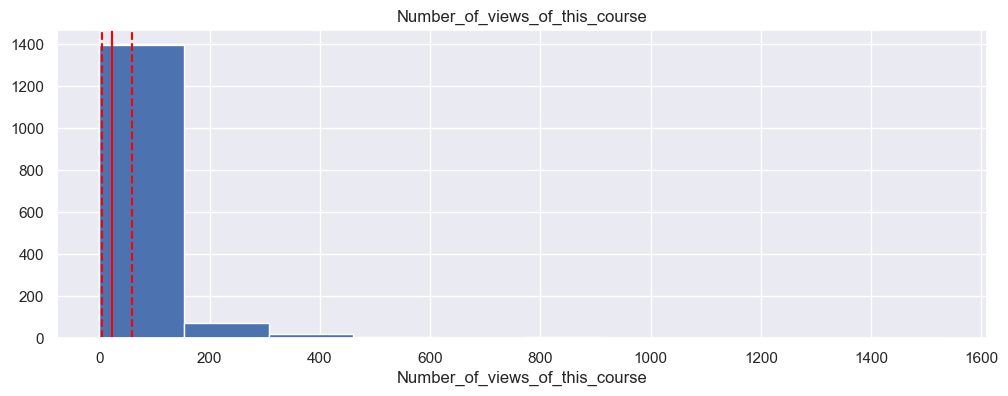

In [32]:
# Draw a histogram where the boundaries are clearly visible (25-50-75 percentile) (before discarding extreme values and outliers)
plt.figure(figsize=(12,4))
plt.hist(ig['Number_of_views_of_this_course'])
plt.title("Number_of_views_of_this_course")
plt.xlabel("Number_of_views_of_this_course")

plt.axvline(get_percentile(ig, 25), linestyle='--', color='red')
plt.axvline(get_percentile(ig, 50), linestyle='-',  color='red')
plt.axvline(get_percentile(ig, 75), linestyle='--', color='red')
plt.show()

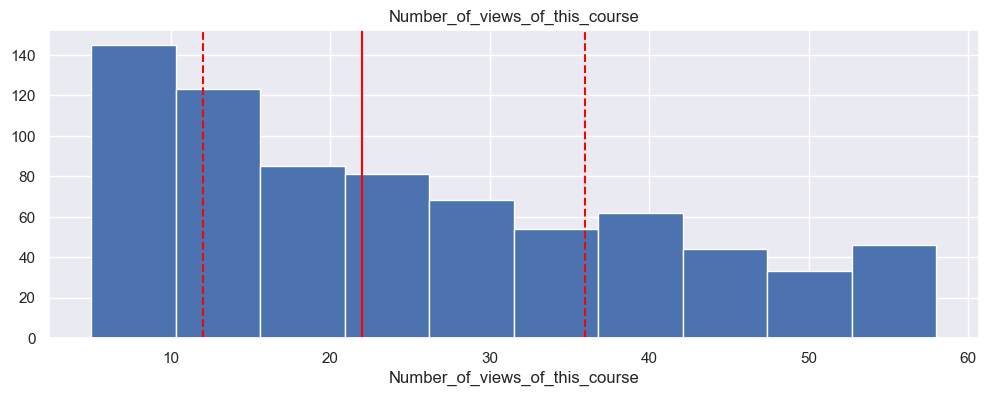

In [33]:
# Draw a histogram where the boundaries are clearly visible (25-50-75 percentile) (after removing extreme values and outliers)
plt.figure(figsize=(12,4))
plt.hist(ig_v2['Number_of_views_of_this_course'])
plt.title("Number_of_views_of_this_course")
plt.xlabel("Number_of_views_of_this_course")

plt.axvline(get_percentile(ig_v2, 25), linestyle='--', color='red')
plt.axvline(get_percentile(ig_v2, 50), linestyle='-',  color='red')
plt.axvline(get_percentile(ig_v2, 75), linestyle='--', color='red')
plt.show()

## <span style="color:red"> 2) DESCRIPTIVE STATISTICS</span>

**Note**: The data set that we will use in this lesson is called *superstore_retail.xlsx*, it is forbidden to distribute the data set to third parties without the permission of the author of the course (Isidora Gatarić). 

In [34]:
# Loading data set that we will use
ig = pd.read_excel('superstore_retail.xlsx')
ig

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [35]:
# Info about the variables/measures/features we have in the data set
ig.columns.to_list()

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

In [1]:
# One additional way to check MAX values of some variable
print(ig['Order Date'].max())

NameError: name 'ig' is not defined

In [37]:
# One additional way to check MIN values of some variable
print(ig['Order Date'].min())

2014-01-03 00:00:00


In [38]:
# Describe function is the best function to check all numeric values staitstics
ig.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [39]:
# If we want to focus only on one of the variables from the data set, and check the descriptive parameters only for it
ig[["Sales"]].describe()

,Sales
count,9994.000000
mean,229.858001
std,623.245101
min,0.444000
25%,17.280000
50%,54.490000
75%,209.940000
max,22638.480000


In [40]:
# When we add the "include=all" argument to the parentheses, then it will also add data on categorical variables (e.g. the most frequent category, etc.)
ig.describe(include='all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994,...,9994.000000,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,NaN,NaN,4,793,793,3,1,531,...,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,NaN,NaN,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,NaN,NaN,5968,37,37,5191,9994,915,...,NaN,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,NaN,NaN,NaN,NaN,NaN,NaN,...,55190.379428,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
min,1.000000,NaN,2014-01-03 00:00:00,2014-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,2015-05-23 00:00:00,2015-05-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,23223.000000,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,NaN,2016-06-26 00:00:00,2016-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,56430.500000,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,NaN,2017-05-14 00:00:00,2017-05-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,90008.000000,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000
max,9994.000000,NaN,2017-12-30 00:00:00,2018-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,99301.000000,NaN,NaN,NaN,NaN,NaN,22638.480000,14.000000,0.800000,8399.976000


In [41]:
# Calculate only the SUM on specific variable
ig[["Sales"]].sum()

Sales    2.297201e+06
dtype: float64

In [42]:
# Calculate only the MEAN on specific variable
ig[["Sales"]].mean()

Sales    229.858001
dtype: float64

In [43]:
# Calculate only the STD on specific variable
ig[["Sales"]].std()

Sales    623.245101
dtype: float64

In [44]:
# Calculate only the MEDIAN on specific variable
ig[["Sales"]].median()

Sales    54.49
dtype: float64

In [45]:
# Calculate only the MODE on specific variable
ig[["Sales"]].mode()

,Sales
0,12.96


In [46]:
# We draw a histogram (simple), on the y axis is the number of cases that have a certain amount of sales (x axis)
fig = px.histogram(ig, x="Sales")
fig.show()

In [47]:
# You can also view an additional histogram on what "Sales" looks like by segment, over time (Order Date)
fig = px.histogram(ig, x='Order Date', y='Sales', color='Segment')
fig.update_layout(
    yaxis_title_text='Sales ($)',
    xaxis_title_text='Order Date',
    legend_title_text='Segment'
)
fig.show()

In [48]:
# We create a pie chart with variables (this is in percentages)
fig = px.pie(ig, values='Sales', names='Segment', title='Sales per segment')
fig.show()

## <span style="color:red"> 3) INFERENTIAL STATISTICS</span>

**Note**: Different data sets will be used for each of the analyses that will be performed. Statistical tests that will be performed and data sets that will be used (in parentheses):

- T-test for independent samples (*fakedata_datacamp_byisi.xlsx*);
- T-test for dependent samples (*ttest_anova_repeated_measures.xlsx*);
- ANOVA for independent samples (*fakedata_datacamp_byisi.xlsx*);
- ANOVA for dependent samples (*repeated_measures.xlsx*);
- Mann-Whitney U (*fakedata_datacamp_byisi.xlsx*);
- Kruskal-Wallis (*fakedata_datacamp_byisi.xlsx*);
- Wilcoxon signed-rank test (*repeated_measures.xlsx*);
- Friedman (*repeated_measures.xlsx*).

In [49]:
############# T-TEST FOR INDEPENDENT SAMPLES
# Importing additional .py packages
from scipy import stats
from numpy import mean
from scipy.stats import sem
from scipy.stats import t
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from scipy.stats import chisquare

In [50]:
# If you dont have some of them, then install it
# pip install researchpy
# pip install scikit-posthocs

In [52]:
# We calculate everything we need for a t-test, from values to values: t, Degrees of freedom, Two sided test p value
rp.ttest(group1= ig_v2['Number_of_views_of_this_course'][ig_v2['Sex'] == "male"], group1_name= "male",
         group2= ig_v2['Number_of_views_of_this_course'][ig_v2['Sex'] == "female"], group2_name= "female")

AttributeError: 'Series' object has no attribute 'append'

<span style="color:green">**The question:**</span>

**Are there statistically significant differences by gender (M/F) in the number of views of this course?**

<span style="color:green">**The interpretation:**</span>

The value of the *p-level*, which tells about the statistical significance of the test, is 0.7698, which tells us that this test is **NOT STATISTICALLY SIGNIFICANT**. The t-test value is -0.2928, while the df value is 735, it is necessary to look at the Mean values (mean value/these are parametric tests) for both groups (men M = 24.97; women M = 25.32). Based on all of the above, it can be concluded that there are no statistically significant differences between men and women regarding the number of views of this course.

In [53]:
############################# T-TEST FOR DEPENDENT SAMPLES
# Loading data set for this statistical analysis
ig1 = pd.read_excel('ttest_anova_repeated_measures.xlsx')
ig1.head(10)

,ID,january,february,march,october,november,december
0,i1,16464,111,825,1,7,1
1,i2,982,1830,986,2,7,2
2,i3,3684,2582,3029,3,6,3
3,i4,2703,2740,2501,4,6,5
4,i5,3068,2580,747,5,7,5
5,i6,3069,2580,1496,6,6,6
6,i7,2053,3013,1064,5,5,6
7,i8,1939,1275,286,4,6,6
8,i9,2061,2723,873,3,7,6
9,i10,2896,3114,2234,6,4,6


<Axes: xlabel='january'>

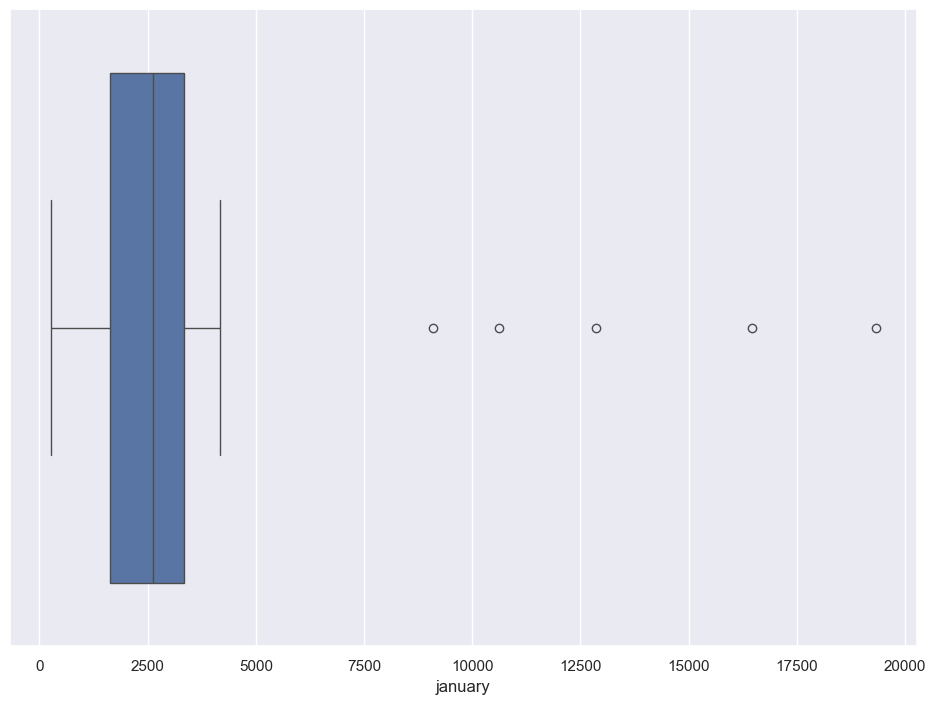

In [54]:
# Checking the data distribution for January (dropping anything above 3000)
sns.boxplot(x=ig1['january'])

In [55]:
# Drop out all values higher than 3000
ig_v3 = ig1.loc[ig1['january'] < 3000]
# ig_v2.head()

<Axes: xlabel='february'>

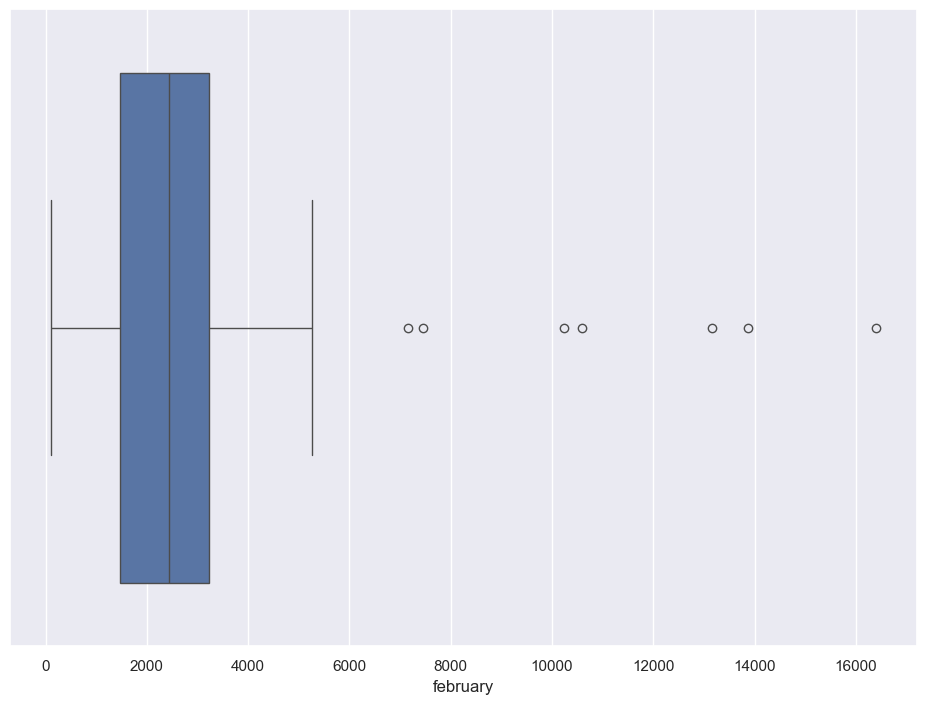

In [56]:
# We check the data distribution for February (we throw out everything above 5000)
sns.boxplot(x=ig1['february'])

In [57]:
# Drop out all values higher than 5000
ig_v3 = ig_v3.loc[ig_v3['february'] < 5000]
# ig_v2.head(10)

<Axes: xlabel='march'>

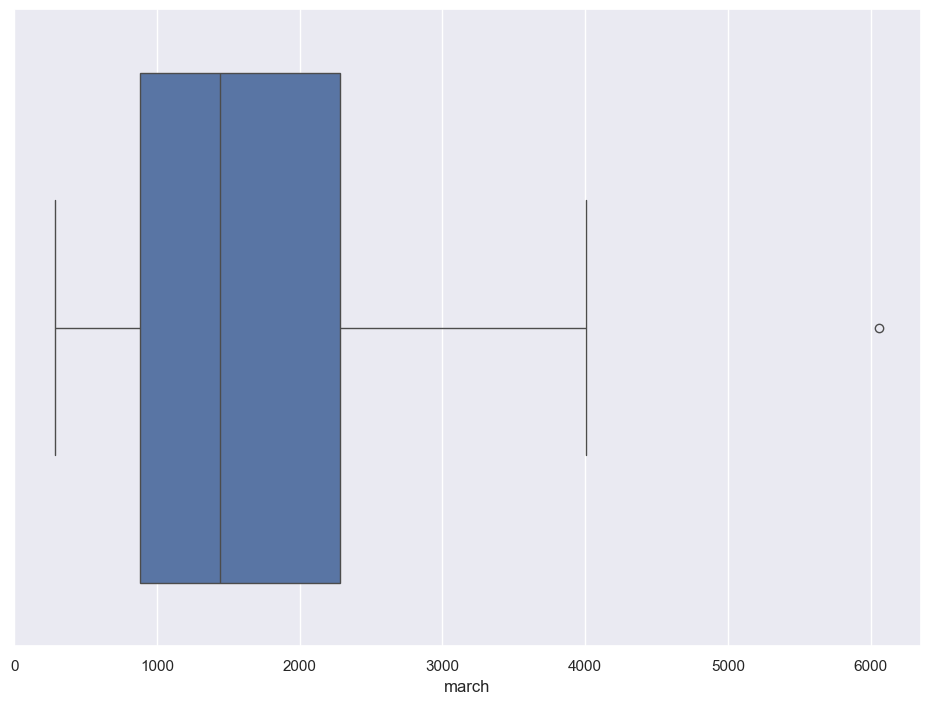

In [58]:
# Checking the data distribution for March (dropping anything above 3900)
sns.boxplot(x=ig1['march'])

In [59]:
# Drop out all values higher than 3900
ig_v3 = ig_v3.loc[ig_v3['march'] < 3900]
# ig_v2.head(10)

In [60]:
# We will perform T-test for dependent samples analysis
stats.ttest_rel(ig_v3['january'], ig_v3['february'])

TtestResult(statistic=-0.8262386718355852, pvalue=0.41591055980412106, df=27)

In [61]:
# Additionally, I need to calculate the Mean
ig_v3[["january", "february"]].mean()

january     1889.178571
february    2068.857143
dtype: float64

<span style="color:green">**The question:**</span>

**In the same sample (same respondents), is there a difference in the number of ad views in January and February?**

<span style="color:green">**The interpretation:**</span>

The value of the *p-level*, which tells about the statistical significance of the test, is 0.415, which again tells us that this test is **NOT STATISTICALLY SIGNIFICANT**. The value of the t-test is -0.8262, and again we have to look at the Mean values (mean value/these are still parametric tests) for both groups (January M = 1889.17; February M = 2068.85). Based on all of the above, it can be concluded that there are no statistically significant differences in the results achieved in January and February.

In [62]:
###################### ANOVA FOR INDEPENDENT SAMPLES
model = ols('Number_of_views_of_this_course ~ Student_expert', data=ig_v2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Student_expert,318.940910,2.0,0.700697,0.496569
Residual,167960.063139,738.0,NaN,NaN


<span style="color:green">**The question**</span>:

**Is there a statistically significant difference in the number of views of this course in relation to expertise (student, beginner, expert)?**

<span style="color:green">**The interpretation**</span>:

Based on this output, we can conclude that the p-level = 0.49, which suggests that there is no statistical significance of this test (F test = 0.700), df = 738, 2. However, we will also do post-hoc analyzes to obtain insight into what is happening between groups.

In [63]:
# Importing additional .py package
import scikit_posthocs as sp

ModuleNotFoundError: No module named 'scikit_posthocs'

In [1]:
# We calculate post-hoc analyses
sp.posthoc_ttest(ig_v2, val_col='Number_of_views_of_this_course', group_col='Student_expert', p_adjust='holm')

NameError: name 'sp' is not defined

<span style="color:green">**The interpretation (post-hoc)**</span>:

Based on the results of the post-hoc analysis, it can be concluded that the differences between none of the groups are statistically significant, we will additionally check the Mean, just to see what those values are. Based on the values below, we can see that they are fairly even.

In [ ]:
# We check the Mean for all three groups of this variable
ig_v2.groupby("Student_expert")["Number_of_views_of_this_course"].mean()

In [ ]:
################## ANOVA FOR DEPENDENT SAMPLES
# Importing additional .py package 
from statsmodels.stats.anova import AnovaRM

In [ ]:
# Loading data set that we will need for this analysis
ig_po = pd.read_excel('C:\\Users\\lenovo\\Desktop\\datasets\\repeated_measures.xlsx')
ig_po.head(10)

In [ ]:
# ANOVA model for repeated measures, we see that it is significant
print(AnovaRM(data=ig_po, depvar='SoldCourses', subject='User', within=['ClientPackage']).fit())

In [ ]:
# Mean for "Sell_Courses", grouped by "Offer"
result = ig_po.groupby('ClientPackage').agg({'SoldCourses': ['mean']})
result

<span style="color:green">**The question**</span>:

**Is there a difference in the number of courses sold, depending on the offer the respondents had?**

<span style="color:green">**The interpretation**</span>:

Based on the results of this statistical test, it can be concluded that the p-level did not reach statistical significance (p = 0.1790), while the F test = 1.7580 (df = 27; 3). To conclude, there are no statistically significant differences in the sold courses among the customers who repeatedly took several types of service packages.

In [ ]:
############### MANN-WHITNEY U
# Importing additional .py package
from scipy.stats import mannwhitneyu

In [ ]:
# The "ig_v2" subset will be used, and here we define groups by gender
group1= ig_v2['Most_viewed_Dccourses'][ig_v2['Sex'] == "male"]
group2= ig_v2['Most_viewed_Dccourses'][ig_v2['Sex'] == "female"]

In [ ]:
# It gives only 2 values, the p level and the height of the MWU test, of course the Median is calculated additionally (let's not forget, here it's not the Mean, but the Median)
res = mannwhitneyu(group1, group2)
print(res)

In [ ]:
# We calculate Median
ig_v2.groupby("Sex")["Most_viewed_Dccourses"].median()

<span style="color:green">**The question**</span>:

**Are there gender differences (M/F) in the number of most viewed DC courses?**

<span style="color:green">**The interpretation**</span>:

Based on the p value (p < 0.05), we can conclude that there is no statistically significant difference between the two genders regarding the measure of the most reviewed KŠ courses. Based on the Median value, it can be concluded that women review our courses slightly more.

In [ ]:
######################## KRUSKAL-WALLIS H-TEST 
group1= ig_v2['Most_viewed_Dccourses'][ig_v2['Student_expert'] == "student"]
group2= ig_v2['Most_viewed_Dccourses'][ig_v2['Student_expert'] == "junior"]
group3= ig_v2['Most_viewed_Dccourses'][ig_v2['Student_expert'] == "expert"]

In [ ]:
# This is the line of code that calculates the test and on the basis of which we get the corresponding statistics
stats.kruskal(group1, group2, group3)

In [ ]:
# Additionally, we calculate Median values to be able to compare
ig_v2.groupby("Student_expert")["Most_viewed_Dccourses"].median()

<span style="color:green">**The question**</span>:

**Are there expert differences (student, beginner, expert) in the number of most viewed DC courses?**

<span style="color:green">**The interpretation**</span>:

Based on the p value (p < 0.05), we can conclude that there is no statistically significant difference between the two genders regarding the measure of the most reviewed courses.

In [ ]:
############## THE WILCOXON SIGNED-RANK TEST
# Wilcoxon test (note: don't get confused by the "mannwhitneyu" function, it's the same author of the package, so he's got his work cut out for him)
W, p_value = mannwhitneyu(ig_v3['november'], ig_v3['december'])
print(W, p_value)

In [ ]:
# Additionally, we calculate the Median to be able to compare groups
ig_v3[["november", "december"]].median()

<span style="color:green">**The question**</span>:

**Are there gender differences in the rating given to this course by the same respondents in November and December?**

<span style="color:green">**The interpretation:**</span> 

Here we see that the *p level* (the second figure) is less than 0.05, so there is a statistically significant difference. Now, in which direction, we will see that through Median. So to sum it up, they liked us a lot more in November - we were getting better ratings.

In [ ]:
######################## THE FRIEDMAN TEST
# We define all three groups for the three months that will be used in the analysis
g1 = ig_v3['october']
g2 = ig_v3['november']
g3 = ig_v3['december']

In [ ]:
# We calculate the Friedman test, to see if there is a difference between groups
stats.friedmanchisquare(g1,g2,g3)

In [ ]:
# Calculation of Median
ig_v3[["october", "november", "december"]].median()

<span style="color:green">**The question**</span>:

**Are there gender differences in the rating given to this course by the same respondents in October, November and December?**

<span style="color:green">**The interpretation:**</span> 

Based on the height of the *p value*, we conclude that there are statistically significant differences between these three groups (p < 0.05), and that the second group (*November*) is the group with the highest Median (therefore, the highest ratings from clients were received then), and the lowest ratings from clients were received in the month of *October*.

## <span style="color:red"> 4) CORRELATION AND REGRESSION</span>

**Note**: The data set that we will use in this lesson is called *correlation_regression.xlsx*, it is forbidden to distribute the data to third parties without the permission of the author of the course (Isidora Gatarić). 

In [ ]:
# Importing of additional .py package
from scipy.stats import pearsonr

In [ ]:
# Loading data file (correlation/regression)
kr = pd.read_excel('C:\\Users\\lenovo\\Desktop\\datasets\\corr_reg.xlsx')
kr

In [ ]:
#################### PEARSON CORRELATION
corr = kr[['how many_times_you_opened_the_link','number_of_hours_spent_on_the_course']]
# In the table itself there is information about the strength of correlation (r)
# Moderate correlation (up to about 0.3); strong (up to about 0.7); extremely strong (up to about 1)

In [ ]:
# Calculation of the Pearson correlation coefficient
stats.pearsonr(corr['how many_times_you_opened_the_link'], corr['number_of_hours_spent_on_the_course'])

In [ ]:
# Scatter plot as a representation of the correlation between two selected variables
corr.plot.scatter('how many_times_you_opened_the_link','number_of_hours_spent_on_the_course', s=None, c=None)

In [ ]:
###################### SPEARMAN'S RANK CORRELATION
scorr = kr[['how many_times_you_opened_the_link','number_of_hours_spent_on_the_course']]
scorr.corr(method='spearman', min_periods=1)

<span style="color:green">**The interpretation:**</span> 

There is a correlation between these two variables (*how many_times_you_opened_link* and *number_of_hours_spent_on_the_course*) (r = 0.47) and in a positive direction (the sign is positive). After the Pearson correlation, we also checked the Spearman correlation ... which is slightly higher.

**Note:** Some general "limit" is that if the correlation is lower than 0.25 it is considered that the connection does not exist (there are exceptions, but for this initial level, this knowledge is quite ok to guide you).

In [ ]:
################ LINEAR REGRESSION
# Importing of additional .py packages that we will need
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
# We create a regression model (we define X and Y), draw a scatter diagram
X = kr.iloc[:, 1].values.reshape(-1, 1)
Y = kr.iloc[:, 2].values.reshape(-1, 1)
linear_regressor = LinearRegression()
r = linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [ ]:
# We calculate the regression score (R)
r.score(X,Y)
# The low score here is due to the fact that we did not clean the data

**Note**: You can clean the data and do the regression again on the data in which there are no NaNs, NULL, outliers and extreme values. After that you will see how much the strength of association between the two variables has improved.